Baseline for predicting filtered shear stress (Linear Regression)

In [1]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data = loadmat('/content/drive/My Drive/Colab Notebooks/Labquake_prediction/MLpreprocessed_code/data/p5270_ML_Master.mat')

m_t = pd.DataFrame({'Time':data['Time'].ravel().round(2), 'SS':data['SS'].ravel()})    # TTF and TSF not used
a_t = pd.DataFrame({'Time':data['LocalAcTime'].ravel().round(2), 'A_filt':data['A_filt'].ravel(), 'V_filt':data['V_filt'].ravel(),
                    'T_pc':data['T_pc'].ravel(), 'Vel_pc':data['Vel_pc'].ravel(), 'T_der':data['T_der'].ravel(), 'Vel_der':data['Vel_der'].ravel()})
                   # 'T_off':data['T_off'].ravel(), 'Vel_off':data['Vel_off'].ravel()})

df = a_t.merge(m_t, on='Time')

df = df.drop(['Time', 'T_der', 'Vel_der'], axis=1)  # Drop irrelevant features 

xdf = df.drop(['SS'], axis=1)
ydf = df['SS']

print(xdf.shape)
print(ydf.shape)

(132399, 4)
(132399,)


In [3]:

# Split into train-test
x_train, x_test, y_train, y_test = train_test_split(xdf, ydf, test_size=0.3, shuffle=False)

# Train the model
model = LinearRegression().fit(x_train, y_train)

# Evaluate
y_predTrain = model.predict(x_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_predTrain))
train_r2 = r2_score(y_train, y_predTrain)

y_predTest = model.predict(x_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_predTest))
test_r2 = r2_score(y_test, y_predTest)

print("R2 scores: Train - %0.5f,  Test - %0.5f" %(train_r2, test_r2))
print("RMSE scores: Train - %0.5f,  Test - %0.5f" %(train_rmse, test_rmse))


R2 scores: Train - 0.77951,  Test - 0.80833
RMSE scores: Train - 0.05996,  Test - 0.06373


Text(0.5, 1.0, 'All data plot')

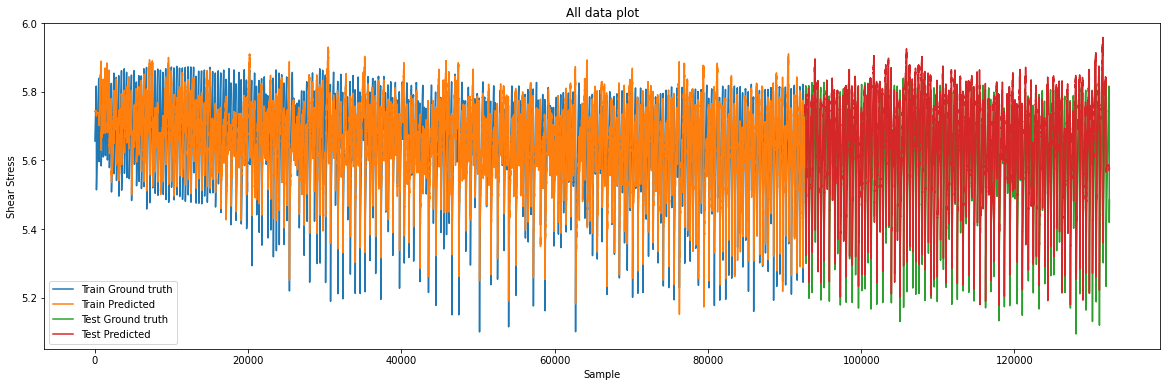

In [4]:
# Results plot

fig = plt.figure(1, figsize=(20,6))
plt.plot(y_train)
plt.plot(y_predTrain)
plt.plot(y_test)
plt.plot(y_test.index, y_predTest)
plt.xlabel('Sample')
plt.ylabel('Shear Stress')
plt.legend(['Train Ground truth', 'Train Predicted', 'Test Ground truth', 'Test Predicted'])
plt.title('All data plot')